In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# reading a csv file using pandas library
dt=pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
dt=dt.rename(columns={ 'Delivery Time':'DT','Sorting Time':'ST'})

{'whiskers': [<matplotlib.lines.Line2D at 0x2498ab323d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2498ab32a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2498ab32070>],
 'medians': [<matplotlib.lines.Line2D at 0x2498ab43190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2498ab434f0>],
 'means': []}

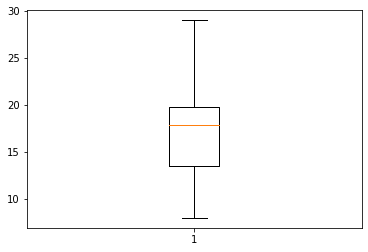

In [5]:
plt.boxplot(dt.DT)

{'whiskers': [<matplotlib.lines.Line2D at 0x2498ac0abb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2498ac172b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2498ac0a820>],
 'medians': [<matplotlib.lines.Line2D at 0x2498ac17970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2498ac17cd0>],
 'means': []}

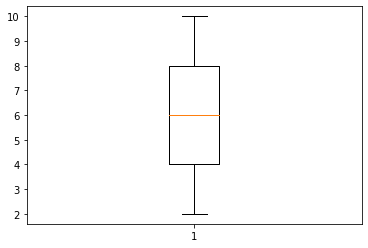

In [6]:
plt.boxplot(dt.ST)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

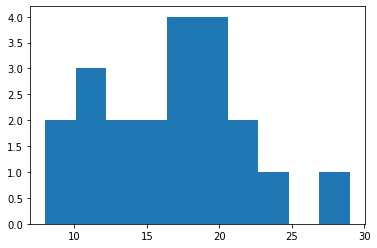

In [7]:
plt.hist(dt.DT)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

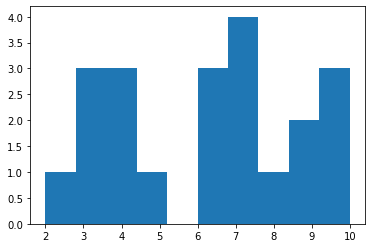

In [8]:
plt.hist(dt.ST)

Text(0, 0.5, 'DT')

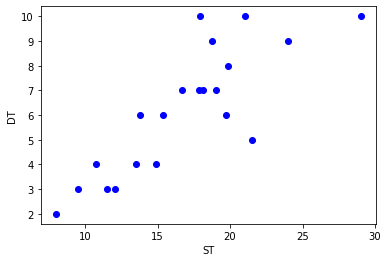

In [9]:
plt.plot(dt.DT,dt.ST,"bo")
plt.xlabel('ST')
plt.ylabel('DT')

In [10]:
dt.DT.corr(dt.ST)

0.8259972607955326

In [57]:
import statsmodels.formula.api as smf
model=smf.ols("DT~ST",data=dt).fit()
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        18:10:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(model.conf_int(0.05))

                  0          1
Intercept  2.979134  10.186334
ST         1.108673   2.189367


In [60]:
dt.count()

DT        21
ST        21
ST_sqr    21
dtype: int64

In [61]:
pred = model.predict(dt.iloc[:,1])
pred
pd.set_option("display.max_rows", 42) 
pred


0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [65]:
rmse_lin = np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred))**2))
rmse_lin 

2.7916503270617654

In [66]:
pred.corr(dt.DT)

0.8259972607955325

Text(0, 0.5, 'delivery %time')

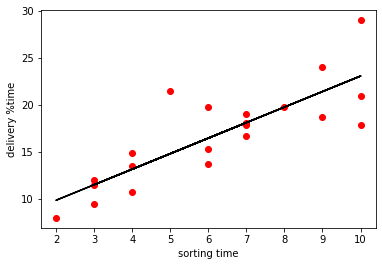

In [64]:
import matplotlib.pylab as plt
plt.scatter(x=dt['ST'],y=dt['DT'],color='red')
plt.plot(dt['ST'],pred,color='black')
plt.xlabel('sorting time')
plt.ylabel('delivery %time')

In [21]:
model2 = smf.ols('DT~np.log(ST)',data=dt).fit()
model2.params


Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           2.64e-06
Time:                        15:24:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred2 = model2.predict(pd.DataFrame(dt['ST']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

(array([1., 0., 3., 0., 3., 1., 3., 4., 1., 5.]),
 array([ 7.42810005,  8.8835813 , 10.33906255, 11.7945438 , 13.25002504,
        14.70550629, 16.16098754, 17.61646879, 19.07195003, 20.52743128,
        21.98291253]),
 <BarContainer object of 10 artists>)

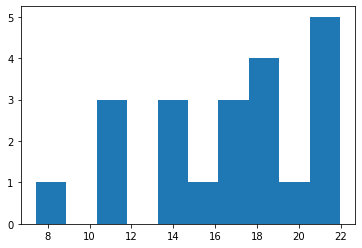

In [53]:
plt.hist(pred2)

In [25]:
rmse_log = np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred2))**2))
rmse_log 

2.733171476682066

In [26]:
pred2.corr(dt.DT)

0.8339325279256244

Text(0, 0.5, 'delivery time')

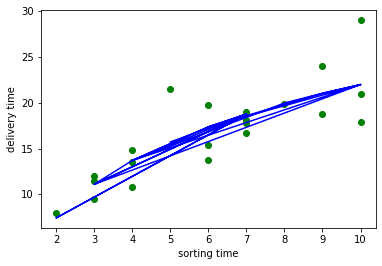

In [68]:
plt.scatter(x=dt['ST'],y=dt['DT'],color='green')
plt.plot(dt['ST'],pred2,color='blue')
plt.xlabel('sorting time')
plt.ylabel('delivery time')

In [29]:
model3 = smf.ols('np.log(DT)~ST',data=dt).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.59e-06
Time:                        15:31:19   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred_log = model3.predict(pd.DataFrame(dt['ST']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [31]:
pred3=np.exp(pred_log)  # as we have used log(DT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [32]:
pred3.corr(dt.DT)

0.808578010828926

In [33]:
rmse_exp = np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred3))**2))
rmse_exp 

2.940250323056201

Text(0, 0.5, 'delivery time')

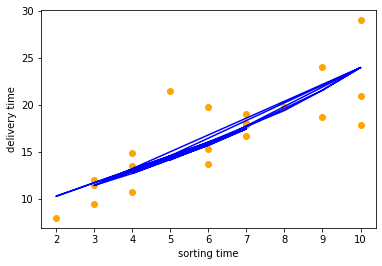

In [34]:
plt.scatter(x=dt['ST'],y=dt['DT'],color='orange')
plt.plot(dt['ST'],pred3,color='blue')
plt.xlabel('sorting time')
plt.ylabel('delivery time')

In [35]:
student_resid = model3.resid_pearson 
student_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

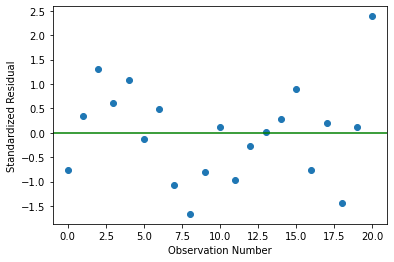

In [36]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

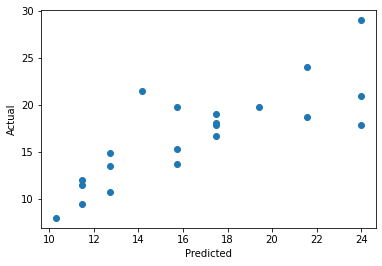

In [37]:
plt.scatter(x=pred3,y=dt.DT)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [39]:
dt["ST_sqr"]=dt.ST*dt.ST
dt

,DT,ST,ST_sqr
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [41]:
model_quad = smf.ols("np.log(DT)~ST+ST_sqr",data=dt).fit()
model_quad.params

Intercept    1.699704
ST           0.265922
ST_sqr      -0.012841
dtype: float64

In [42]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           2.20e-06
Time:                        15:49:12   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sqr        -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred_quad = model_quad.predict(dt)
pred4=np.exp(pred_quad)  # as we have used log(DT) in preparing model so we need to convert it back
pred4


0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [44]:
pred4.corr(dt.DT)

0.8258882749910931

In [45]:
rmse_quad = np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred4))**2))
rmse_quad 

2.799041988740925

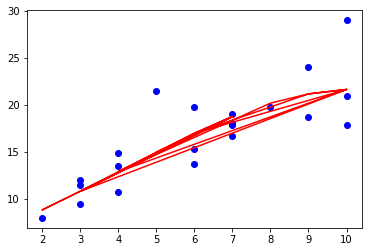

In [46]:
plt.scatter(dt.ST,dt.DT,c="b")
plt.plot(dt.ST,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

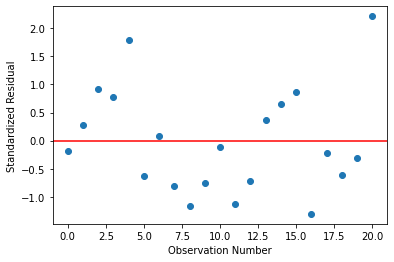

In [49]:
plt.scatter(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

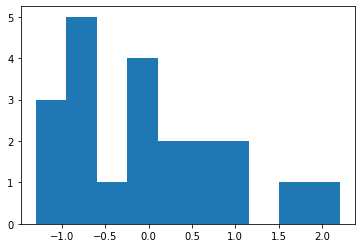

In [51]:
plt.hist(model_quad.resid_pearson)

In [52]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,10.990922,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867
